In [2]:
import random
import copy


$y=mx+c$

== Sol ==
m = 2.4605328359508833
c = -0.3849332112373527


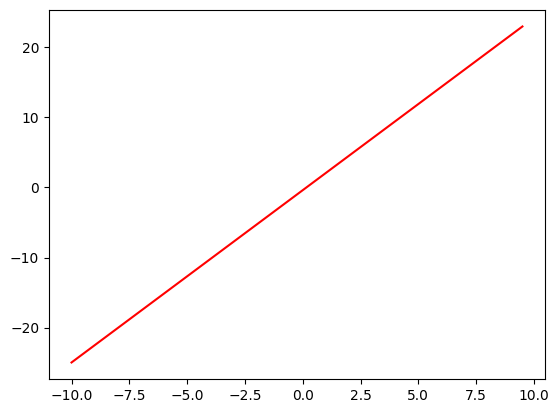

In [3]:
import matplotlib.pyplot as plt
import numpy as np

m_sol = random.random()*5-2.5
c_sol = random.random()*5-2.5
print('== Sol ==')
print('m =',m_sol)
print('c =',c_sol)

x=np.arange(-10,10,0.5)
y=m_sol*x+c_sol

plt.plot(x,y,'r')

# Extra

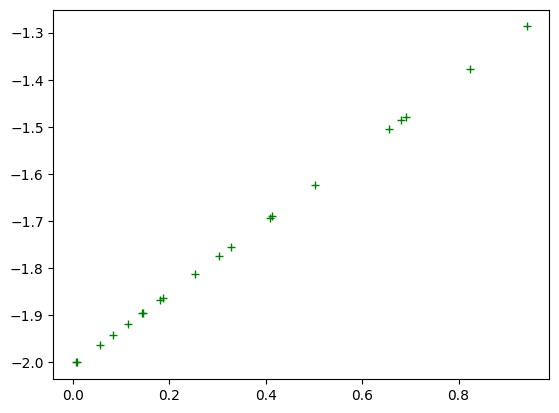

In [ ]:
import random
Data=np.random.rand(20,2)
Data[:,1]=m_sol*Data[:,0]+c_sol+(random.random()/10-0.05)
plt.plot(Data[:,0],Data[:,1],'g+')

# GA to Fit Curve mx+c

Try to fit `y=mx+c`

population:

[m1,c1]
[m2,c2]

In [ ]:
import random
import numpy as np

m_sol=random.random()*10-5
c_sol=random.random()*10-5
m_sol,c_sol

(2.695234559362727, 4.084096243195937)

In [ ]:
def mutation(population):
  mutated = []
  for pop in population:
    p = random.random()
    if p > 0.5:
      mutated.append([pop[0]+random.random()*5-2.5,pop[1]])
    else:
      mutated.append([pop[0],pop[1]+random.random()*5-2.5])
  return mutated

def cross_over(population):
  return [[population[0][0],population[1][1]],[population[1][0],population[0][1]]]

def fitness(param,n):
  m = param[0]
  c = param[1]
  xs = [random.random()*10-5 for i in range(5)]
  ys_hat = np.array([m*xs[i]+c for i in range(5)])
  ys_actual = np.array([m_sol*xs[i]+c_sol for i in range(5)])
  return (ys_hat-ys_actual).dot((ys_hat-ys_actual).T)

def selection(population,n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population = unique_pop
  find_fitness = [(fitness(pop,n),pop) for pop in population]
  find_fitness.sort()
  # print(find_fitness)
  return find_fitness[0],[p for f,p in find_fitness[:2]]

def is_better(p1,p2):
  if len(p2) == 0 or p1[0] <= p2[0]:
    return True
  return False

def show_pop(population):
  for pop in population:
    print(pop)

In [ ]:
n = 2

population = [[int(random.random()*10-5) for i in range(n)]]
population += [[int(random.random()*10-5) for i in range(n)]]
print(population)
mutated = mutation(population)
print(mutated)
crossovered = cross_over(population)
print(crossovered)

[[-2, 0], [-4, 0]]
[[0.2848225242869278, 0], [-4.224701581199864, 0]]
[[-2, 0], [-4, 0]]


In [ ]:
n = 2
for i in range(30): # ทำ 30 ครั้ง
  population = [[random.random()*2*n-n for i in range(n)]]
  population += [[random.random()*2*n-n for i in range(n)]]

  print('Start')
  print(population)
  print('=========')
  best_found = tuple()
  for i in range(100000):
    mutated = mutation(population)
    cross_overed = cross_over(population)
    best_pop,population = selection(population+mutated+cross_overed,n)
    if is_better(best_pop,best_found):
      best_found = best_pop
    # show_pop(population)
    if fitness(best_found[1],n) <= 1e-5:
      print('Found at generation',i)
      break
    if i % 1000 == 0:
      print(i,best_found)
      print()
  print('=====')
  print(best_found)
  print()

Start
[[-0.8218244706423441, 1.933592468614207], [0.8204131830082115, -1.3973087165831313]]
0 (8.415964103899137, [1.5863384785034436, 1.933592468614207])

1000 (1.3450747599573744e-05, [2.698014199498255, 4.09151577834434])

2000 (4.17664539990244e-06, [2.6942368065978712, 4.082787084175006])

Found at generation 2004
=====
(4.17664539990244e-06, [2.6942368065978712, 4.082787084175006])

Start
[[1.7990416729765202, -1.7429832104970493], [0.2918048426709112, 1.0673543659057274]]
0 (53.296315579085906, [1.7990416729765202, 1.0673543659057274])

1000 (1.5298036595520537e-05, [2.6962287062223327, 4.088078729919305])

Found at generation 1002
=====
(1.5298036595520537e-05, [2.6962287062223327, 4.088078729919305])

Start
[[-0.12134771177556569, -1.78458083818033], [0.04364180871525569, -1.0848003074756076]]
0 (234.6248894018301, [0.04364180871525569, -1.0848003074756076])

1000 (0.00013944981798420843, [2.691952621131051, 4.0772294548306585])

2000 (7.429023147775978e-05, [2.691952621131051

# GA to Fit Curve $ax^2+bx+c$

This is an exercise. You can try to do it.

Try to fit $y=ax^2+bx+c$

population:

[a,b,c]
[a,b,c]

In [4]:
a_sol=random.random()*5-2.5
b_sol=random.random()*10-5
c_sol=random.random()*10-5

## Modify this part

In [5]:
# def mutation(population):
#   mutated = []
#   for pop in population:
#     p = random.random()
#     if p > 0.5:
#       mutated.append([pop[0]+random.random()*5-2.5,pop[1]])
#     else:
#       mutated.append([pop[0],pop[1]+random.random()*5-2.5])
#   return mutated

def mutation(population):
    mutated = []
    for pop in population:
        p = random.random()
        if p > 0.66:
            mutated.append([pop[0] + random.random() * 5 - 2.5, pop[1], pop[2]])
        elif p > 0.33:
            mutated.append([pop[0], pop[1] + random.random() * 5 - 2.5, pop[2]])
        else:
            mutated.append([pop[0], pop[1], pop[2] + random.random() * 5 - 2.5])
    return mutated

def cross_over(population):
  #return [[population[0][0],population[1][1]],[population[1][0],population[0][1]]]
  return [
        [population[0][0], population[1][1], population[0][2]],
        [population[1][0], population[0][1], population[1][2]]
    ]

def fitness(param,n):
  #m = param[0]
  #c = param[1]
  a = param[0]
  b = param[1]
  c = param[2]
  xs = [random.random()*10-5 for i in range(5)]
  #ys_hat = np.array([m*xs[i]+c for i in range(5)])
  ys_hat = np.array([a*xs[i]*xs[i]+b*xs[i]+c for i in range(5)])
  #ys_actual = np.array([m_sol*xs[i]+c_sol for i in range(5)])
  ys_actual = np.array([a_sol*xs[i]*xs[i]+b_sol*xs[i]+c_sol for i in range(5)])
  return (ys_hat-ys_actual).dot((ys_hat-ys_actual).T)

def selection(population,n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population = unique_pop
  find_fitness = [(fitness(pop,n),pop) for pop in population]
  find_fitness.sort()
  # print(find_fitness)
  return find_fitness[0],[p for f,p in find_fitness[:2]]

def is_better(p1,p2):
  if len(p2) == 0 or p1[0] <= p2[0]:
    return True
  return False

def show_pop(population):
  for pop in population:
    print(pop)

In [6]:
n = 3

population = [[int(random.random()*10-5) for i in range(n)]]
population += [[int(random.random()*10-5) for i in range(n)]]
print(population)
mutated = mutation(population)
print(mutated)
crossovered = cross_over(population)
print(crossovered)

[[-2, 2, 2], [0, 2, -3]]
[[-3.7802657669067874, 2, 2], [2.134334952807941, 2, -3]]
[[-2, 2, 2], [0, 2, -3]]


In [7]:
n = 3
for i in range(30):
  population = [[int(random.random()*n) for i in range(n)]]
  population += [[int(random.random()*n) for i in range(n)]]

  print('Start')
  print(population)
  print('=========')
  best_found = tuple()
  for i in range(100000):
    mutated = mutation(population)
    cross_overed = cross_over(population)
    best_pop,population = selection(population+mutated+cross_overed,n)
    if is_better(best_pop,best_found):
      best_found = best_pop
    # show_pop(population)
    if fitness(best_found[1],n) <= 1e-3:
      print('Found at generation',i)
      break
    if i % 1000 == 0:
      print(i,best_found)
      print()
  print('=====')
  print(best_found)
  print()

Start
[[2, 2, 0], [1, 1, 2]]
0 (38.83857407143938, [1, 2, 2])

Found at generation 574
=====
(0.0002614119394840217, [1.435373230492941, 3.6415272762594695, 0.24624903316252267])

Start
[[0, 1, 2], [0, 1, 0]]
0 (144.67379299919037, [0, 3.310087617494939, 0])

Found at generation 161
=====
(0.0017346907822733929, [1.4227703312449647, 3.6591052970715268, 0.2623878118328071])

Start
[[1, 0, 1], [0, 1, 0]]
0 (260.63183567719085, [1, 0, 1])

1000 (0.0038435412175318396, [1.4494595373793544, 3.651669186964128, 0.19894098945941208])

Found at generation 1102
=====
(0.001983464822428188, [1.4423421765832312, 3.6483771383737924, 0.2359820369971133])

Start
[[0, 1, 0], [1, 2, 0]]
0 (127.4226989405004, [1, 2, 0])

Found at generation 337
=====
(0.00019992038014483173, [1.4377092706273493, 3.6525880622670144, 0.24388293246031267])

Start
[[2, 1, 2], [1, 2, 1]]
0 (87.63072769147301, [1, 2.1386909011055764, 1])

1000 (0.002880521174262983, [1.4405745930386957, 3.6825611326978986, 0.31183982006439015

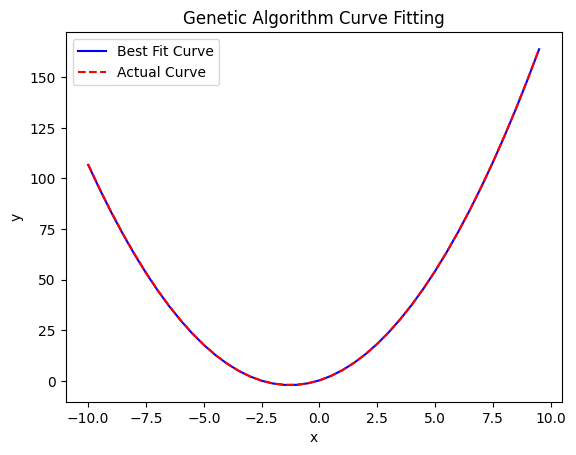

In [10]:
# Plotting the results
a_best, b_best, c_best = best_found[1]

# Generate data points for plotting
#x_values = np.linspace(-5, 5, 100)
x_values=np.arange(-10,10,0.5)
y_best_fit = a_best * x_values**2 + b_best * x_values + c_best
y_actual = a_sol * x_values**2 + b_sol * x_values + c_sol

# Plot the best fit and the actual curve
plt.plot(x_values, y_best_fit, label='Best Fit Curve', color='blue')
plt.plot(x_values, y_actual, label='Actual Curve', color='red', linestyle='--')
plt.legend()
plt.title('Genetic Algorithm Curve Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Covid19 Thailand (12 Aug 21-25 Oct 21)

In [ ]:
! wget https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv

--2022-01-28 01:46:33--  https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv
Resolving data.go.th (data.go.th)... 164.115.75.59
Connecting to data.go.th (data.go.th)|164.115.75.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228072402 (218M) [text/csv]
Saving to: ‘confirmed-cases-since-120864.csv’

confirmed-cases-sin 100%[===================>] 217.51M  1.04MB/s    in 2m 29s  

2022-01-28 01:49:05 (1.46 MB/s) - ‘confirmed-cases-since-120864.csv’ saved [228072402/228072402]



In [ ]:
import pandas as pd

df=pd.read_csv('confirmed-cases-since-120864.csv')

In [ ]:
df.groupby('announce_date').count()['No.']

announce_date
1/10/2021     11754
1/9/2021      14802
10/10/2021    10817
10/9/2021     14403
11/10/2021    10035
              ...  
7/9/2021      13821
8/10/2021     11140
8/9/2021      14176
9/10/2021     10630
9/9/2021      16031
Name: No., Length: 75, dtype: int64

In [ ]:
df['announce_date'].unique()

array(['2021-08-12T00:00:00.000000000', '2021-08-13T00:00:00.000000000',
       '2021-08-14T00:00:00.000000000', '2021-08-15T00:00:00.000000000',
       '2021-08-16T00:00:00.000000000', '2021-08-17T00:00:00.000000000',
       '2021-08-18T00:00:00.000000000', '2021-08-19T00:00:00.000000000',
       '2021-08-20T00:00:00.000000000', '2021-08-21T00:00:00.000000000',
       '2021-08-22T00:00:00.000000000', '2021-08-23T00:00:00.000000000',
       '2021-08-24T00:00:00.000000000', '2021-08-25T00:00:00.000000000',
       '2021-08-26T00:00:00.000000000', '2021-08-27T00:00:00.000000000',
       '2021-08-28T00:00:00.000000000', '2021-08-29T00:00:00.000000000',
       '2021-08-30T00:00:00.000000000', '2021-08-31T00:00:00.000000000',
       '2021-09-01T00:00:00.000000000', '2021-09-02T00:00:00.000000000',
       '2021-09-03T00:00:00.000000000', '2021-09-04T00:00:00.000000000',
       '2021-09-05T00:00:00.000000000', '2021-09-06T00:00:00.000000000',
       '2021-09-07T00:00:00.000000000', '2021-09-08

In [ ]:
import numpy as np

days=25
df['announce_date']=pd.to_datetime(df['announce_date'],dayfirst=True)
cc=np.array(df.groupby('announce_date').count()['No.'][-days:])
dd=[i for i in range(1,days+1)]

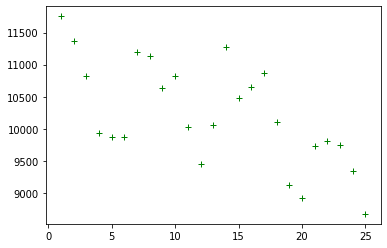

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(dd,cc,'g+')

In [ ]:
def mutation(population):
  mutated = []
  for pop in population:
    ind=[0,1,2,3,4,5]
    i=random.choice(ind)
    new_pop=list(pop)
    new_pop[i] = new_pop[i]+random.random()*10-5
    mutated.append(new_pop)
  return mutated

def cross_over(population):
  ind=[0,1,2,3,4]
  i=random.choice(ind)
  return [population[0][:i+1]+population[1][i+1:],population[1][:i+1]+population[0][i+1:]]

def fitness(param,n):
  a = param[0]
  b = param[1]
  c = param[2]
  d = param[3]
  e = param[4]
  f = param[5]
  xs = dd
  ys_hat = np.array([a*x**5+b*x**4+c*x**3+d*x**2+e*x+f for x in xs])
  ys_actual = cc
  return (ys_hat-ys_actual).dot((ys_hat-ys_actual).T)

def selection(population,n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population = unique_pop
  find_fitness = [(fitness(pop,n),pop) for pop in population]
  find_fitness.sort()
  # print(find_fitness)
  return find_fitness[0],[p for f,p in find_fitness[:2]]

def is_better(p1,p2):
  if len(p2) == 0 or p1[0] <= p2[0]:
    return True
  return False

def show_pop(population):
  for pop in population:
    print(pop)

In [ ]:
import random
n = 6

population = [[random.random() for i in range(n)]]
population += [[random.random() for i in range(n)]]
print(population)
mutated = mutation(population)
print(mutated)
crossovered = cross_over(population)
print(crossovered)

[[0.4294221437312765, 0.702967171965792, 0.4998231741543351, 0.33185856457177276, 0.8641318388985989, 0.6401472587297816], [0.3468069817411935, 0.502633084926378, 0.7438017078793151, 0.8288453283134177, 0.5150429464536554, 0.6551680440677602]]
[[0.4294221437312765, 0.702967171965792, -3.5871399209607397, 0.33185856457177276, 0.8641318388985989, 0.6401472587297816], [0.3468069817411935, 0.502633084926378, 0.7438017078793151, -2.0590948796972857, 0.5150429464536554, 0.6551680440677602]]
[[0.4294221437312765, 0.702967171965792, 0.7438017078793151, 0.8288453283134177, 0.5150429464536554, 0.6551680440677602], [0.3468069817411935, 0.502633084926378, 0.4998231741543351, 0.33185856457177276, 0.8641318388985989, 0.6401472587297816]]


In [ ]:
n=6
population = [[random.random() for i in range(n)]]
population += [[random.random() for i in range(n)]]

print('Start')
print(population)
print('=========')
best_found = tuple()
for i in range(500000):
  mutated = mutation(population)
  cross_overed = cross_over(population)
  best_pop,population = selection(population+mutated+cross_overed,n)
  if is_better(best_pop,best_found):
    best_found = best_pop
  # show_pop(population)
  if fitness(best_found[1],n) <= 1e-3:
    print('Found at generation',i)
    break
  if i % 1000 == 0:
    print(i,best_found)
    print()
print('=====')
print(best_found)
print()

Start
[[0.20862710202896861, 0.9607657326844825, 0.8401884598423044, 0.5196675545893726, 0.5211741200905157, 0.44565365178813665], [0.7429595537317686, 0.4596799659260634, 0.3132435549510091, 0.20047046406920033, 0.584827376576837, 0.25209339141997344]]
0 (16746583415224.117, [0.20862710202896861, 0.9607657326844825, 0.8401884598423044, 0.5196675545893726, 0.5211741200905157, 0.44565365178813665])

1000 (96816642074.73419, [0.20862710202896861, -4.286673551222544, -27.140956628342867, 384.81546888812096, 284.4082740661721, 169.8540855325053])

2000 (46746303019.288414, [0.20862710202896861, -4.648514603871228, -33.57042685465187, 697.9460957609521, 582.4951421791295, 362.44976153004643])

3000 (33096954441.922123, [0.20862710202896861, -4.648514603871228, -44.01780704989545, 906.1623160952394, 864.6319512935853, 565.4474133266589])

4000 (26520862198.708195, [0.20862710202896861, -4.726794558595198, -49.51505193719607, 1059.6162040487877, 1037.0886665876396, 401.5448783640967])

5000 (

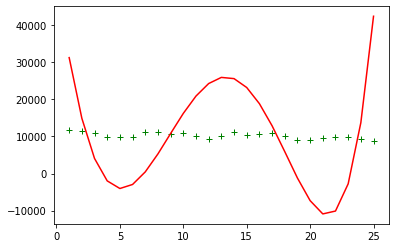

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(param):
  a = param[0]
  b = param[1]
  c = param[2]
  d = param[3]
  e = param[4]
  f = param[5]
  xs = dd
  ys_hat = np.array([a*x**5+b*x**4+c*x**3+d*x**2+e*x+f for x in xs])
  return ys_hat

plt.plot(dd,cc,'g+')
plt.plot(dd,f(best_found[1]),'r')